In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("GermanCredit.csv", header=0)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [3]:
#preprocessing pt 1

sub_df = df.loc[: , (df == 'none').any()]
sub_df

columns = []
to_be_removed = {}

for col in sub_df:
    columns.append(col)
    
for col in range(0, len(columns)):
    to_be_removed[columns[col]] = len(df[df[columns[col]] == "none"])
    
temp = []
res = {}
for key, val in to_be_removed.items():
    if val not in temp:
        temp.append(val)
        res[key] = val
        if(len(res)==3):
            break
            
df.drop(res, axis=1, inplace = True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [4]:
#preprocessing pt 2
df.replace('\'','', regex=True, inplace=True) 
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [5]:
#preprocessing pt 3
df['checking_status'].mask(df['checking_status'] == 'no checking', 'No Checking', inplace = True)
df['checking_status'].mask(df['checking_status'] == '<0', 'Low', inplace = True)
df['checking_status'].mask(df['checking_status'] == '0<=X<200', 'Medium', inplace = True)
df['checking_status'].mask(df['checking_status'] == '>=200', 'High', inplace = True)

df

# df.to_csv('check_file.csv', encoding='utf-8', index=False)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [6]:
#preprocessing pt 4
df['savings_status'].mask(df['savings_status'] == 'no known savings', 'No Savings', inplace = True)
df['savings_status'].mask(df['savings_status'] == '<100', 'Low', inplace = True)
df['savings_status'].mask(df['savings_status'] == '100<=X<500', 'Medium', inplace = True)
df['savings_status'].mask(df['savings_status'] == '500<=X<1000', 'High', inplace = True)
df['savings_status'].mask(df['savings_status'] == '>=1000', 'High', inplace = True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [7]:
#preprocessing pt 5
df["class"] = np.where(df["class"] == "good", 1, 0)
df

df.to_csv('check_file.csv', encoding='utf-8', index=False)

In [8]:
#preprocessing pt 6
df['employment'].mask(df['employment'] == 'unemployed', 'Unemployed', inplace = True)
df['employment'].mask(df['employment'] == '<1', 'Amateur', inplace = True)
df['employment'].mask(df['employment'] == '1<=X<4', 'Professional', inplace = True)
df['employment'].mask(df['employment'] == '4<=X<7', 'Experienced', inplace = True)
df['employment'].mask(df['employment'] == '>=7', 'Expert', inplace = True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [9]:
#analysis pt 1a
pd.crosstab(df['foreign_worker'], df['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [10]:
#analysis pt 1b
pd.crosstab(df['employment'], df['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [11]:
#analysis pt 2
tot = 0
count = 0
employment = []
personal_status = []
credit_amount = [] 

for column in df['employment']:
    employment.append(column)
for column in df['personal_status']:
    personal_status.append(column)
for column in df['credit_amount']:
    credit_amount.append(column)
    
for x in range (0, df.shape[0]):
    if(employment[x] == 'Experienced' and personal_status[x] == 'male single'):
        tot+=credit_amount[x]
        count+=1

print("average credit amount for single males with 'experienced' employment status = ", tot/count)

average credit amount for single males with 'experienced' employment status =  4142.592592592592


In [12]:
#analysis pt 3

credit_amount = []
job = []
unemp, unskilled, skilled, high_qual = 0, 0, 0, 0
tot1, tot2, tot3, tot4 = 0, 0, 0, 0

for column in df['duration']:
    credit_amount.append(column)
for column in df['job']:
    job.append(column)
    

for x in range (0, df.shape[0]):
    if(job[x] == 'unemp/unskilled non res'):
        unemp+=credit_amount[x]
        tot1+=1
        
    if(job[x] == 'unskilled resident'):
        unskilled+=credit_amount[x]
        tot2+=1
        
    if(job[x] == 'skilled'):
        skilled+=credit_amount[x]
        tot3+=1
        
    if(job[x] == 'high qualif/self emp/mgmt'):
        high_qual+=credit_amount[x]
        tot4+=1     

print('average credit duration for unemp/unskilled non res = ', unemp/tot1)
print('average credit duration for unskilled resident = ', unskilled/tot2)
print('average credit duration for skilled = ', skilled/tot3)
print('average credit duration for high qualif/self emp/mgmt = ', high_qual/tot4)

average credit duration for unemp/unskilled non res =  17.363636363636363
average credit duration for unskilled resident =  16.535
average credit duration for skilled =  21.41111111111111
average credit duration for high qualif/self emp/mgmt =  25.16891891891892


In [13]:
#analysis part 4
 
print("Most common checking status: ", df['checking_status'].value_counts().idxmax()) 
print("Most common savings status: ", df['savings_status'].value_counts().idxmax()) 

Most common checking status:  No Checking
Most common savings status:  Low


<BarContainer object of 1000 artists>

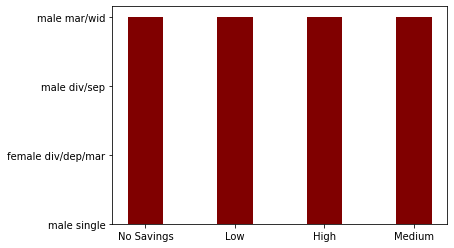

In [14]:
#savings statusus  No Savings Low Medium High High 
plt.bar(df['savings_status'], df['personal_status'], color ='maroon',
        width = 0.4)